# Part I - (Data Analysis and Visualization of the Prosper Loan Dataset)
## by Oluwabukola G. Adegboro

## Introduction
> The original dataset contains 113,937 entries with 81 features. The majority of the variables under the respective features were numeric in nature with an exception of some variables with string input e.g (ListingKey, ListingCreationDate, CreditGrade, LoanStatus, ClosedDate, ProsperRating (Alpha), BorrowerState, Occupation, EmploymentStatus, GroupKey, DateCreditPulled, FirstRecordedCreditLine, IncomeRange, LoanKey,  LoanOriginationDate, LoanOriginationQuarter, MemberKey) or boolean values such as the features ('IsBorrowerHomeowner','CurrentlyInGroup', and 'IncomeVerifiable'). Some features also contain missing values.

## Preliminary Wrangling


### Data Assessment

Assessing the data visually and programmatically.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import missingno as msno

%matplotlib inline

In [2]:
# To increase the width when displaying the CSV file.
pd.set_option('display.max_colwidth', 0)
# Reference: https://stackoverflow.com/questions/34376896/pandas-dataframes-how-to-wrap-text-with-no-whitespace

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# Getting the data visualization directory 
data_visualization_directory=('C:\\Users\\User\\OneDrive\\Documents\\Udacity\\Nanodegree\\Introduction_to_Data_Analysis\\data_visualization\\')

# Read the prosperLoanData csv file
csv_file_path = os.path.join(data_visualization_directory, 'dataset\\prosperLoanData.csv')
data_df = pd.read_csv(csv_file_path)
# viewing the first 10 rows of the prosperLoanData csv file
data_df.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
# Viewing the last 10 rows of the prosperLoanData csv file.
data_df.tail(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113927,E3433419834735803891976,322787,2008-04-30 21:25:19.670000000,AA,36,Completed,2011-05-09 00:00:00,0.07469,0.0679,0.0579,...,-68.47,0.0,0.0,0.0,0.0,1.0,2,0,0.0,194
113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,NaN,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,...,-4.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,25
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,NaN,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,...,-6.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,26
113930,E35D3584034795373BCD69A,831523,2013-07-08 10:24:49.700000000,NaN,36,Current,NaN,0.20053,0.1639,0.1539,...,-16.51,0.0,0.0,0.0,0.0,1.0,0,0,0.0,52
113931,E36F36005339663245C20F8,1141292,2014-01-16 20:13:08.040000000,NaN,60,Current,NaN,0.15016,0.1274,0.1174,...,-21.23,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274
113936,E6ED3600409833199F711B7,1140093,2014-01-15 09:27:37.657000000,NaN,36,Current,NaN,0.13189,0.1039,0.0939,...,-1.70,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
# Getting a summary information on the prosperLoanData csv file.
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Getting a descriptive summary of the prosperLoanData csv file data.
data_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# Printing the shape of the prosperLoanData csv file.
data_df.shape

(113937, 81)

In [8]:
# Printing the dtype of the prosperLoanData csv file.
data_df.dtypes

ListingKey                     object 
ListingNumber                  int64  
ListingCreationDate            object 
CreditGrade                    object 
Term                           int64  
                               ...    
PercentFunded                  float64
Recommendations                int64  
InvestmentFromFriendsCount     int64  
InvestmentFromFriendsAmount    float64
Investors                      int64  
Length: 81, dtype: object

In [9]:
# Checking for the total number of missing values per column of the prosperLoanData csv file.
data_df.isna().sum().sort_values(ascending=False)

GroupKey                         100596
LoanFirstDefaultedCycleNumber    96985 
ScorexChangeAtTimeOfListing      95009 
ProsperPrincipalOutstanding      91852 
ProsperPrincipalBorrowed         91852 
                                 ...   
IncomeRange                      0     
IncomeVerifiable                 0     
StatedMonthlyIncome              0     
LoanKey                          0     
Investors                        0     
Length: 81, dtype: int64

In [10]:
# Checking for the percentage of missing values per column of the prosperLoanData csv file.
data_df.isnull().sum().sort_values(ascending=False)/len(data_df)

GroupKey                         0.882909
LoanFirstDefaultedCycleNumber    0.851216
ScorexChangeAtTimeOfListing      0.833873
ProsperPrincipalOutstanding      0.806165
ProsperPrincipalBorrowed         0.806165
                                   ...   
IncomeRange                      0.000000
IncomeVerifiable                 0.000000
StatedMonthlyIncome              0.000000
LoanKey                          0.000000
Investors                        0.000000
Length: 81, dtype: float64

<AxesSubplot:>

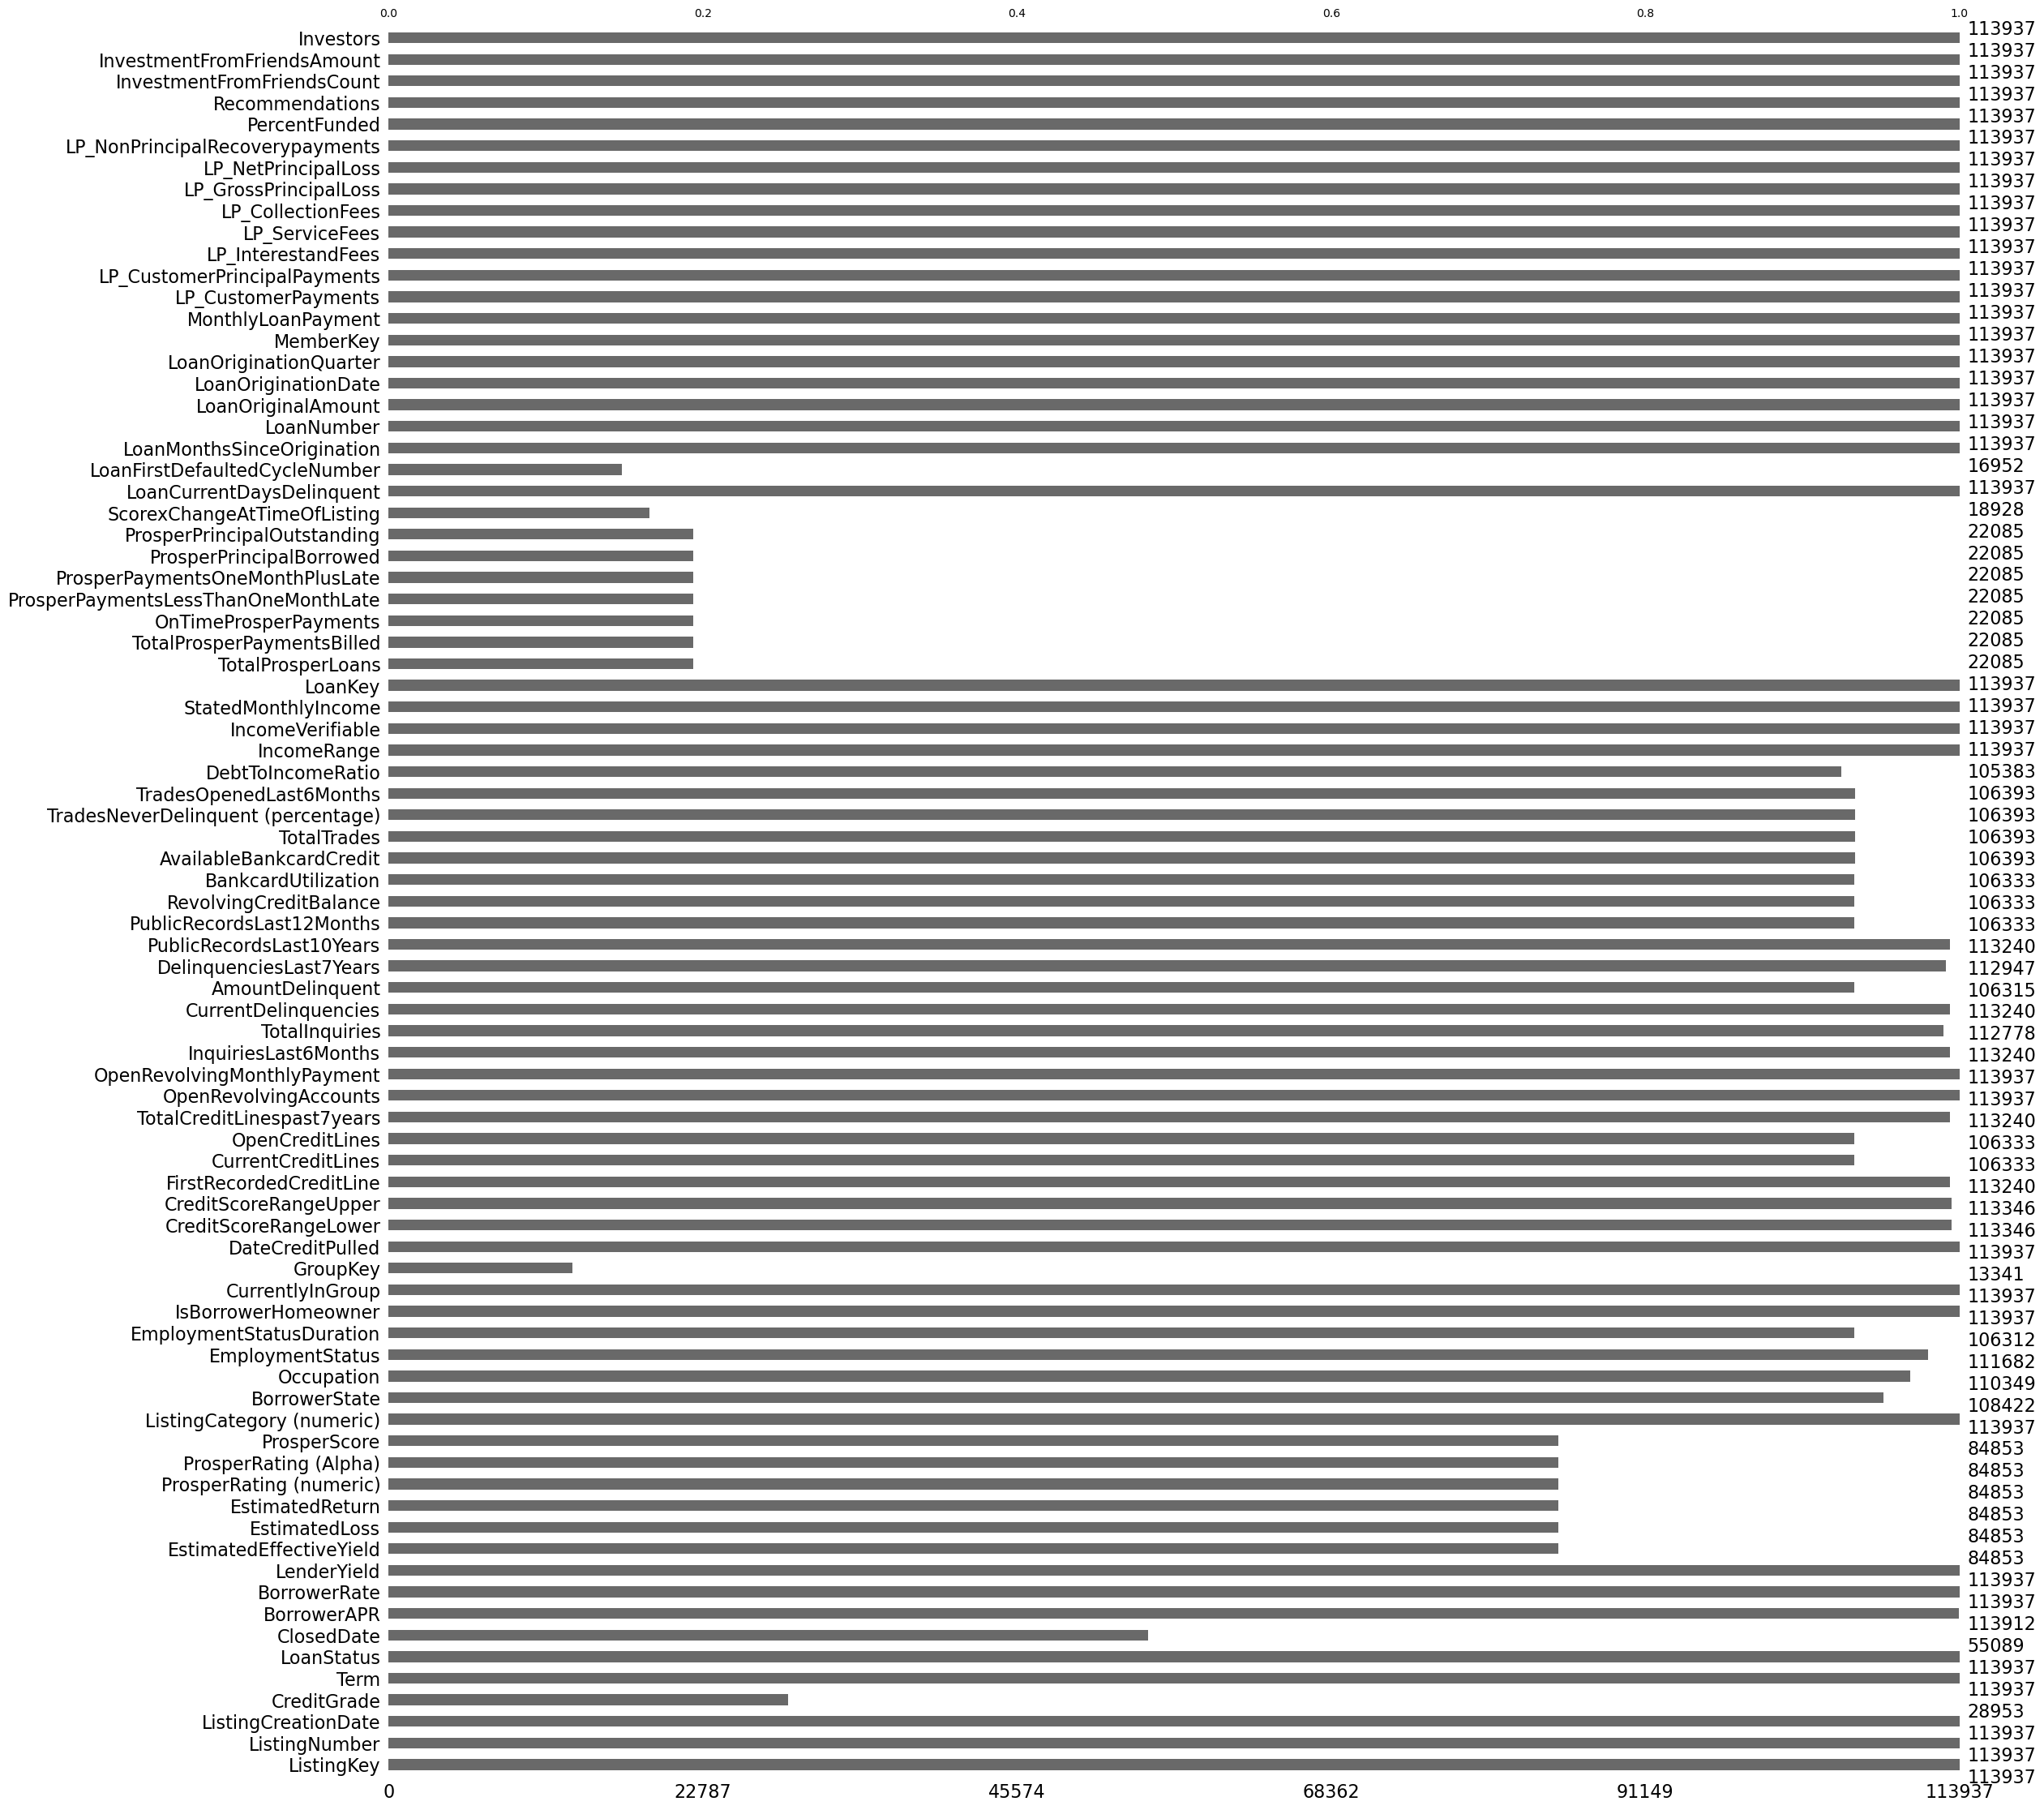

In [11]:
# Visualizing the number of non-missing values in prosperLoanData csv file.
msno.bar(data_df)

# Reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/?ref=rp

In [12]:
# Getting columns with null values greater than (>) 70% of the total original data (i.e 79,756) in the prosperLoanData csv file.
missing_col_list = list(set(data_df.columns[data_df.isnull().sum()>=79756]))
missing_col_list
# Reference: https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values

['GroupKey',
 'LoanFirstDefaultedCycleNumber',
 'ProsperPrincipalOutstanding',
 'CreditGrade',
 'ScorexChangeAtTimeOfListing',
 'TotalProsperLoans',
 'ProsperPaymentsLessThanOneMonthLate',
 'OnTimeProsperPayments',
 'ProsperPrincipalBorrowed',
 'TotalProsperPaymentsBilled',
 'ProsperPaymentsOneMonthPlusLate']

### Data Cleaning
Cleaning the dataset and ensuring as much as possible that it is tidy.

**Step 1**: Dropping columns with null values greater than (>) 70% of the total original data (i.e 79,756) in the csv file.

In [13]:
# Make copies of original pieces of data
data_df_copy=data_df.copy()
data_df_copy.head(10)

# Dropping columns with null values greater than (>) 70% of the total original data (i.e 79,756) in the csv file.
data_df_copy = data_df_copy.drop(missing_col_list, axis=1)

In [14]:
# Getting a summary information on the csv file.
data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   ClosedDate                          55089 non-null   object 
 6   BorrowerAPR                         113912 non-null  float64
 7   BorrowerRate                        113937 non-null  float64
 8   LenderYield                         113937 non-null  float64
 9   EstimatedEffectiveYield             84853 non-null   float64
 10  EstimatedLoss                       84853 non-null   float64
 11  EstimatedReturn           

In [15]:
# Printing the shape of the data.
data_df_copy.shape

(113937, 70)

**Step 2**: Dropping empty rows with null values/records.

In [16]:
# Drop empty rows with null values/records.
data_df_copy = data_df_copy.dropna(axis=0, how='any')

In [17]:
# Viewing the first 5 rows of the csv file.
data_df_copy.head(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
15,0F483544120452347F48121,577164,2012-04-10 09:14:46.297000000,36,Defaulted,2012-12-19 00:00:00,0.35797,0.3177,0.3077,0.2896,...,-9.81,0.0,3790.25,3790.25,0.0,1.0,0,0,0.0,10
23,101B35764008108187B2EBA,758964,2013-04-22 13:29:19.073000000,36,Defaulted,2013-12-26 00:00:00,0.28032,0.2419,0.2319,0.2126,...,-4.89,0.0,1882.27,1882.27,0.0,1.0,0,0,0.0,30
26,0F4F3571508214190FD75CB,713131,2013-02-12 18:07:31.690000000,60,Completed,2013-10-22 00:00:00,0.30748,0.2809,0.2709,0.2473,...,-25.81,0.0,0.00,0.00,0.0,1.0,0,0,0.0,37
27,0F5034867864161084F3789,463083,2010-06-16 16:23:44.533000000,36,Completed,2013-07-03 00:00:00,0.11296,0.0920,0.0820,0.0608,...,-64.62,0.0,0.00,0.00,0.0,1.0,0,0,0.0,121
30,0F57353904771934596FE9F,555213,2012-01-30 17:59:17.200000000,36,Completed,2012-12-19 00:00:00,0.12782,0.0999,0.0899,0.0897,...,-68.22,0.0,0.00,0.00,0.0,1.0,0,0,0.0,30


In [18]:
# Viewing the last 5 rows of the csv file.
data_df_copy.tail(5)

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113905,C97E35311333117565C8E84,539189,2011-11-15 15:32:05.890000000,36,Chargedoff,2013-02-04 00:00:00,0.35797,0.3177,0.3077,0.2896,...,-27.96,0.0,3325.15,3325.15,0.0,1.0,0,0,0.0,69
113913,D2013482695428940FAD9E3,455673,2010-04-25 15:13:27.963000000,36,Completed,2013-05-05 00:00:00,0.12410,0.1030,0.0930,0.0717,...,-129.82,0.0,0.00,0.00,0.0,1.0,0,0,0.0,265
113928,E34935176664905343E01EA,510097,2011-06-06 19:02:44.443000000,36,Completed,2011-09-19 00:00:00,0.22362,0.1899,0.1799,0.1757,...,-4.41,0.0,0.00,0.00,0.0,1.0,0,0,0.0,25
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657000000,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,0.2318,...,-6.54,0.0,0.00,0.00,0.0,1.0,0,0,0.0,26
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.2445,...,-235.05,0.0,0.00,0.00,0.0,1.0,0,0,0.0,274


In [19]:
# Getting a summary information on the csv file.
data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23016 entries, 15 to 113935
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          23016 non-null  object 
 1   ListingNumber                       23016 non-null  int64  
 2   ListingCreationDate                 23016 non-null  object 
 3   Term                                23016 non-null  int64  
 4   LoanStatus                          23016 non-null  object 
 5   ClosedDate                          23016 non-null  object 
 6   BorrowerAPR                         23016 non-null  float64
 7   BorrowerRate                        23016 non-null  float64
 8   LenderYield                         23016 non-null  float64
 9   EstimatedEffectiveYield             23016 non-null  float64
 10  EstimatedLoss                       23016 non-null  float64
 11  EstimatedReturn                     230

In [20]:
# Getting a descriptive summary of the data.
data_df_copy.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,2.301600e+04,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,...,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000,23016.000000
mean,5.573038e+05,38.081335,0.246678,0.215329,0.205313,0.172894,0.090811,0.106523,3.763990,6.422098,...,-53.678577,-16.682120,1175.669542,1149.202038,23.896893,0.997077,0.034715,0.019769,11.597948,95.446211
std,1.157175e+05,10.634626,0.090755,0.084495,0.084500,0.080377,0.054380,0.037941,1.814682,2.280240,...,53.855817,122.906129,2915.212237,2883.554117,210.226327,0.025817,0.274269,0.176873,202.887959,101.228339
min,4.162750e+05,12.000000,0.045830,0.040000,0.030000,-0.181600,0.004900,-0.181600,1.000000,1.000000,...,-589.950000,-4865.080000,-94.200000,-437.680000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.801885e+05,36.000000,0.171880,0.144900,0.134900,0.105100,0.049900,0.077100,2.000000,5.000000,...,-72.590000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000
50%,5.301315e+05,36.000000,0.254860,0.220500,0.210500,0.166900,0.089000,0.111500,4.000000,7.000000,...,-36.165000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,64.000000
75%,6.024475e+05,36.000000,0.329890,0.290000,0.280000,0.243700,0.130000,0.135700,5.000000,8.000000,...,-16.330000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000
max,1.204824e+06,60.000000,0.423950,0.360000,0.340000,0.319900,0.366000,0.266700,7.000000,11.000000,...,3.010000,0.000000,25000.000000,25000.000000,7780.030000,1.000000,18.000000,9.000000,11000.000000,1189.000000


In [21]:
# Printing the shape of the data.
data_df_copy.shape

(23016, 70)

### What is the structure of your dataset?

> After wrangling, the dataset contains 23,016 entries with 70 features. The majority of the variables under the respective features were numeric in nature with an exception of some variables with string input e.g (ListingKey, ListingCreationDate, LoanStatus, ClosedDate, ProsperRating (Alpha), BorrowerState, Occupation, EmploymentStatus, DateCreditPulled, FirstRecordedCreditLine, IncomeRange, LoanKey, LoanOriginationDate, LoanOriginationQuarter, MemberKey) or boolean values such as the features 'IsBorrowerHomeowner','CurrentlyInGroup', and 'IncomeVerifiable'. Some features also contain missing values.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest here is to address if a borrower's income can affect the status of a loan’s outcome. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some important features that can help support this investigation in no particular order are; 
> 1. Prosper Score: This is a custom risk score that ranges between 1(high risk) and 10(low risk) built using historical Prosper data.
2. IncomeRange: This refers to the borrower's income range at the time the listing was created.
3. Debt to Income Ratio: This indicates the debt to income ratio of the borrower at the time the credit profile was pulled.
4. IncomeVerifiable: This shows that the borrower have the required documentation to support their income.
5. StatedMonthlyIncome: This refers to monthly income as stated by the borrower during the time the listing was created.
6. CreditScoreRangeLower: This represents the lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
7. CreditScoreRangeUpper: This represents the upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

> Reference: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

## Univariate Exploration


### Creating plot functions for the bar charts

In [22]:
# Plot functions used for visualization.

def plot_size_and_weight(plot_graph, bold_font=False):
    # To update/change the fontsize of the plot.
    for plot_label in (plot_graph.get_xticklabels() + plot_graph.get_yticklabels()):
        plot_label.set_fontsize(20)
        if bold_font==True:
            plot_label.set_fontweight('bold')
        
def axis_and_titles(plot_title, xaxis_label, yaxis_label, set_grid=False):
    # Setting the title of the figure.
    plt.title(str(plot_title),fontsize = 18)
    # Setting the x-label and y-label of the plot.
    plt.xlabel(str(xaxis_label),fontsize = 15)
    plt.ylabel(str(yaxis_label),fontsize = 15)
    if set_grid==True:
        sb.set_style("whitegrid")

### Question: 

### What is the Risk Score of the Borrowers assigned by Prosper?

ProsperScore is a custom risk score built using historical Prosper data, and ranges from 1 (highest risk)-10 (lowest/best risk).

In [23]:
# Getting the value count of the ProsperScore column.
data_df_copy.ProsperScore.value_counts()

8.0     4251
6.0     3459
9.0     3025
7.0     2866
5.0     2807
4.0     2268
10.0    1610
3.0     1254
2.0     1017
1.0     429 
11.0    30  
Name: ProsperScore, dtype: int64

In [24]:
# Checking the info summary of the ProsperScore column.
data_df_copy.ProsperScore.info()

<class 'pandas.core.series.Series'>
Int64Index: 23016 entries, 15 to 113935
Series name: ProsperScore
Non-Null Count  Dtype  
--------------  -----  
23016 non-null  float64
dtypes: float64(1)
memory usage: 359.6 KB


In [25]:
# Converting the ProsperScore variables to integers
data_df_copy['ProsperScore'] = data_df_copy['ProsperScore'].map(int)

In [26]:
# Since the proper score rating rightly ranges from 1-10,  ratings with 11 will be excluded
data_df_copy = data_df_copy[data_df_copy.ProsperScore!=11]

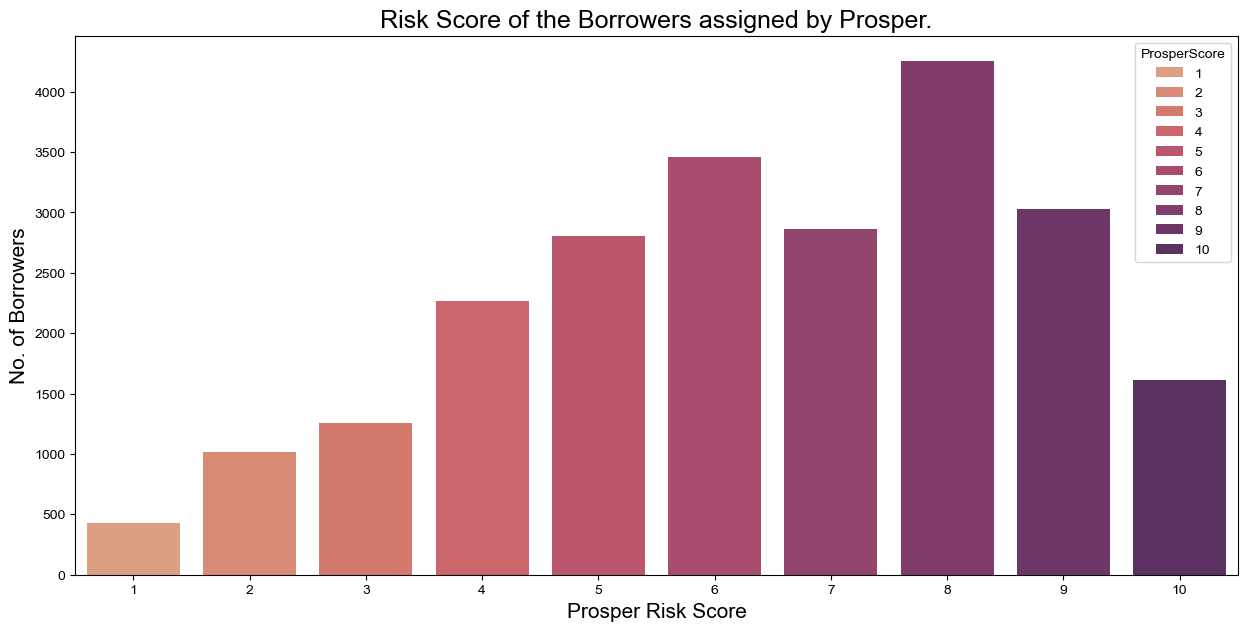

In [27]:
# Plot of the ProsperScore of the Borrowers.
fig, ax = plt.subplots(figsize=(15,7))
x_axis= data_df_copy.ProsperScore
sb.countplot(x=x_axis, hue=x_axis, data=x_axis, palette='flare', dodge=False)
axis_and_titles(plot_title='Risk Score of the Borrowers assigned by Prosper.', 
                xaxis_label= 'Prosper Risk Score',
                yaxis_label= 'No. of Borrowers',
                set_grid=True)

### Observation
The barplot above indicates that a higher number of borrowers fall within the risk factor of 8. This can indicate the borrower is more likely to be granted a loan with a lower risk score. 

### Question
### What is the count of the number of borrowers versus their Income Range?

Income Range is a borrowers's income range can play a role in determining if a loan is granted or not.

In [28]:
# Getting the value_count of the IncomeRange
data_df_copy.IncomeRange.value_counts()

$25,000-49,999    7373
$50,000-74,999    6791
$75,000-99,999    3754
$100,000+         3572
$1-24,999         1495
Not employed      1   
Name: IncomeRange, dtype: int64

Since the variables under the IncomeRange column is not consistent, the 'Not employed' variable would be converted to $0.

In [29]:
# Replacing the 'Non employed' variable with '$0'
data_df_copy.IncomeRange.replace(['Not employed'], '$0', inplace=True)

In [30]:
# Verifying if the value_count of the IncomeRange to see if the 'Non employed' variable has been updated
data_df_copy.IncomeRange.value_counts().sort_values(ascending=False)

$25,000-49,999    7373
$50,000-74,999    6791
$75,000-99,999    3754
$100,000+         3572
$1-24,999         1495
$0                1   
Name: IncomeRange, dtype: int64

Converting the IncomeRange variables into ordered categorical variables.

In [31]:
ordered_ordinal_var_dict =['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999', '$1-24,999', '$0']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ordered_ordinal_var_dict)
data_df_copy['IncomeRange'] = data_df_copy['IncomeRange'].astype(ordered_var)

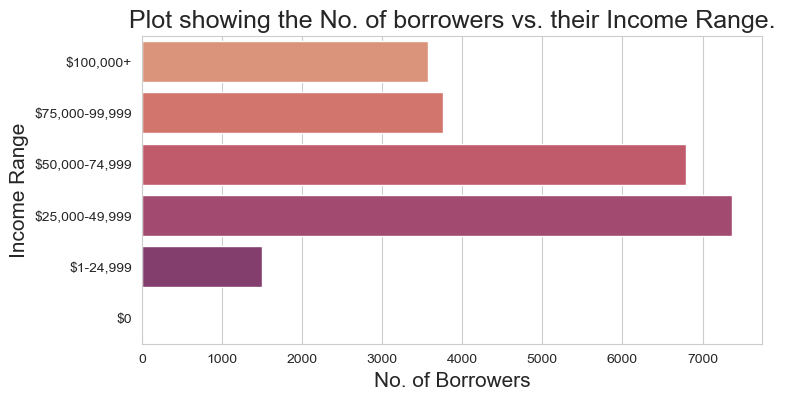

In [32]:
# Plot of the Income Range of the Borrowers.
fig, ax = plt.subplots(figsize=(8, 4))
x_axis= data_df_copy.IncomeRange.value_counts()
y_axis=x_axis.index
sb.barplot(x=x_axis, y=y_axis, orient='h', palette='flare')
axis_and_titles(plot_title="Plot showing the No. of borrowers vs. their Income Range.", 
                xaxis_label= 'No. of Borrowers',
                yaxis_label= 'Income Range',
                set_grid=True)

### Observation
From the barplot above, it is observed that the majority of borrowers have a salary range of $25,000-$49,999 USD. This is followed by borrowers with an income range of $50,000-$74,999USD and so on. The number of borrowers with no income range that is $0 USD and are unemployed are very low when compared to the others with a working salary range.

### Question

### What is the histogram distribution of the borrower's Debt to Income Ratio?

Debt to income Ratio indicates the percentage of how much money is owed each month to how much the borrower earns. It is used by lenders to determine the borrower's ability to manage their monthly payments and repay the money owed.

Reference: https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-en-1791/

In [33]:
# Getting the descriptive statistics of the data
data_df_copy.DebtToIncomeRatio.describe()

count    22986.000000
mean     0.248794    
std      0.384260    
min      0.000000    
25%      0.130000    
50%      0.200000    
75%      0.300000    
max      10.010000   
Name: DebtToIncomeRatio, dtype: float64

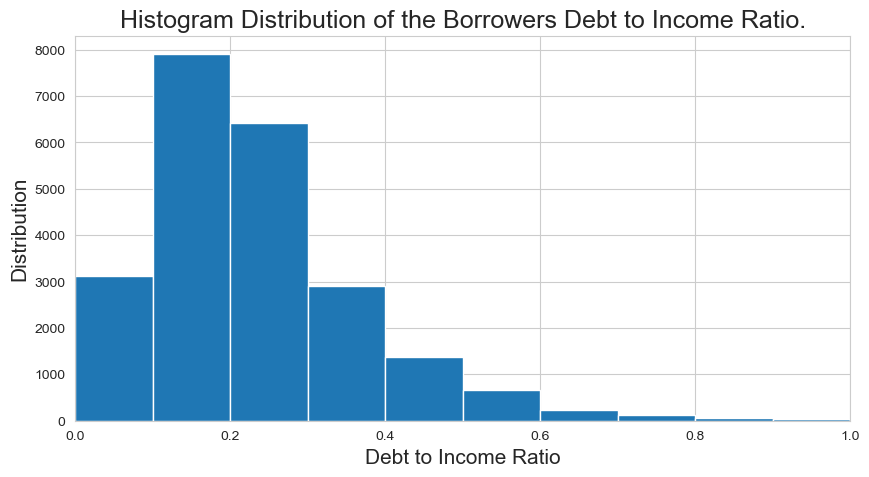

In [34]:
# Plot of the histogram distribution of the DebtToIncomeRatio.
fig, ax = plt.subplots(figsize=(10, 5))

# Get the ticks for bins between [0-10.01], at an interval of 0.1
bins = np.arange(0, data_df_copy['DebtToIncomeRatio'].max()+0.1, 0.1)

# Plot the histogram for the DebtToIncomeRatio column
plt.hist(data=data_df_copy, x='DebtToIncomeRatio', bins=bins);
plt.xlim((0,1));

axis_and_titles(plot_title='Histogram Distribution of the Borrowers Debt to Income Ratio.', 
                xaxis_label= 'Debt to Income Ratio',
                yaxis_label= 'Distribution',
                set_grid=True)

### Observation
The histogram distribution shows that the majority of borrowers have a debt to income ratio between 10% - 20%. This makes sense as the lower the debt to income ratio, the more likely for the borrower to repay their loans under normal circumstances.

###  Question
### What is the histogram distribution of the borrowers lower credit score range?
CreditScoreRangeLower represents the lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

In [35]:
# Get the descriptive statistics of the data.
data_df_copy.CreditScoreRangeLower.describe()

count    22986.000000
mean     701.500044  
std      53.349288   
min      600.000000  
25%      660.000000  
50%      700.000000  
75%      740.000000  
max      880.000000  
Name: CreditScoreRangeLower, dtype: float64

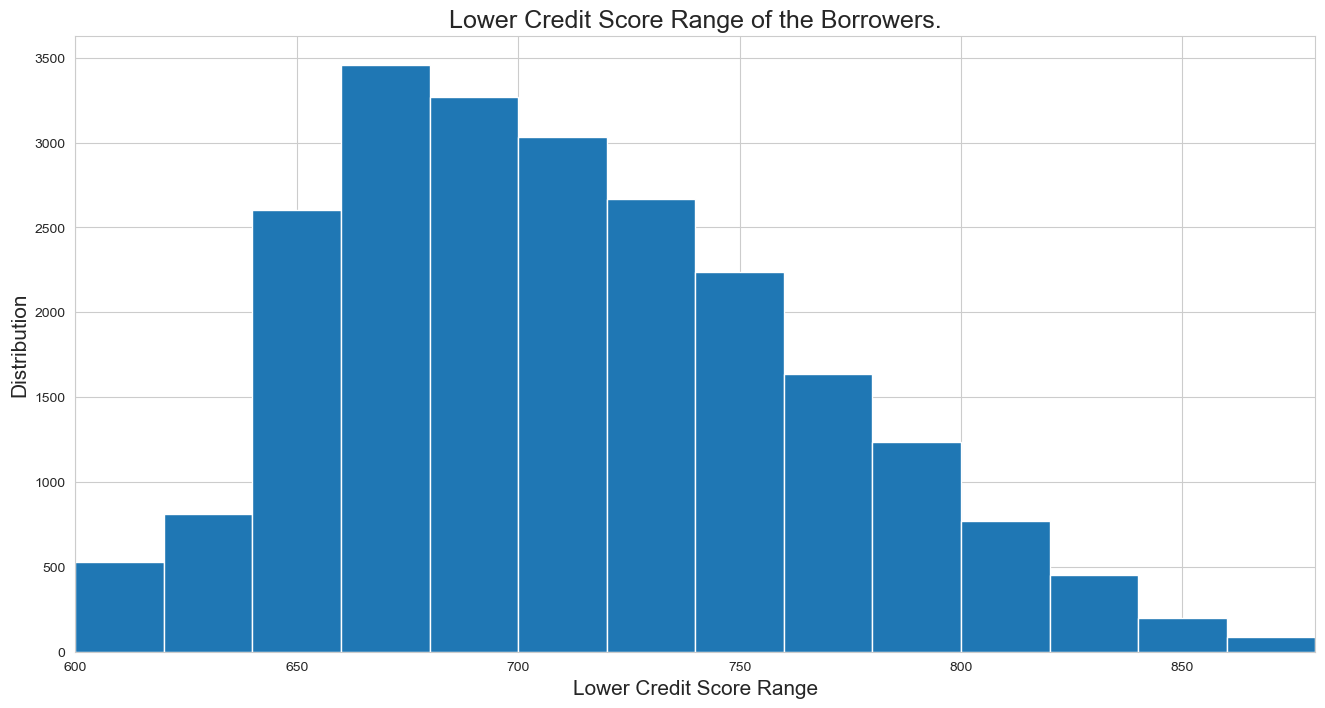

In [36]:
# Plot of the histogram distribution of the CreditScoreRangeLower.
fig, ax = plt.subplots(figsize=(16, 8))

# Get the ticks for bins 
bins = np.arange(0, data_df_copy['CreditScoreRangeLower'].max()+20, 20)

# Plot the histogram for the DebtToIncomeRatio column
plt.hist(data=data_df_copy, x='CreditScoreRangeLower', bins=bins);
plt.xlim((600,880));

axis_and_titles(plot_title='Lower Credit Score Range of the Borrowers.', 
                xaxis_label= 'Lower Credit Score Range',
                yaxis_label= 'Distribution',
                set_grid=True)

### Observation
From the above plot, the Lower Credit Score Range displays a left-skewed distribution with the mean range lower score of approximately 700.

### Question
### What is the histogram distribution of the borrowers upper credit score range?

CreditScoreRangeUpper represents the upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

In [37]:
# Get the descriptive statistics of the data.
data_df_copy.CreditScoreRangeUpper.describe()

count    22986.000000
mean     720.500044  
std      53.349288   
min      619.000000  
25%      679.000000  
50%      719.000000  
75%      759.000000  
max      899.000000  
Name: CreditScoreRangeUpper, dtype: float64

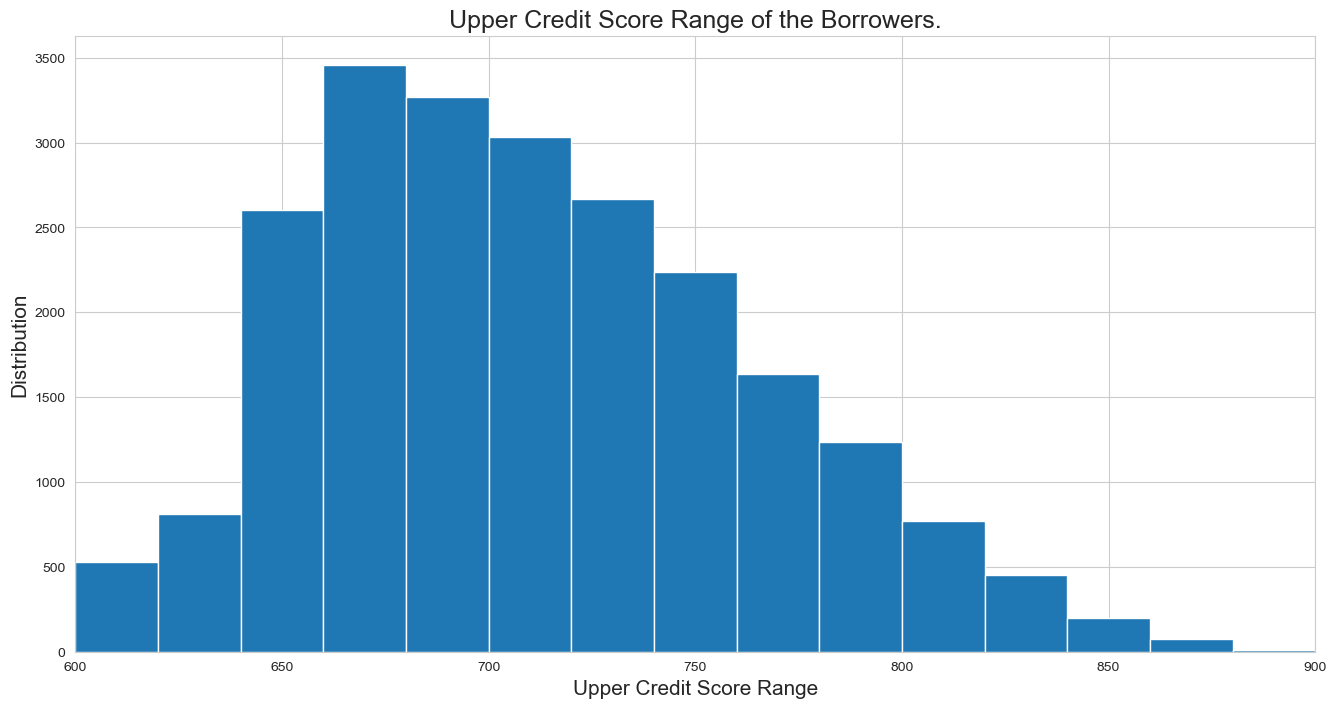

In [38]:
# Plot of the histogram distribution of the CreditScoreRangeUpper.
fig, ax = plt.subplots(figsize=(16, 8))

# Get the ticks for bins 
bins = np.arange(0, data_df_copy['CreditScoreRangeUpper'].max()+20, 20)

# Plot the histogram for the DebtToIncomeRatio column
plt.hist(data=data_df_copy, x='CreditScoreRangeUpper', bins=bins);
plt.xlim((600,900));

axis_and_titles(plot_title='Upper Credit Score Range of the Borrowers.', 
                xaxis_label= 'Upper Credit Score Range',
                yaxis_label= 'Distribution',
                set_grid=True)

### Observation
From the above plot, the Upper Credit Score Range also follows the distribution of the Lower Credit Score Range by displaying a left-skewed and unimodal distribution.

### Question: 
### How many borrowers verified their income?

IncomeVerifiable indicates that the borrower has provided the required documentation to support their income as proof of funds.

In [39]:
# Get the values count of the IncomeVerifiable column.
data_df_copy.IncomeVerifiable.value_counts()

True     22985
False    1    
Name: IncomeVerifiable, dtype: int64

Converting the IncomeVerifiable column to ordered categorical variables.

In [40]:
index_value = data_df_copy.IncomeVerifiable.value_counts().index
ordered_ordinal_var_dict = index_value
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ordered_ordinal_var_dict)
data_df_copy['IncomeVerifiable'] = data_df_copy['IncomeVerifiable'].astype(ordered_var)

In [41]:
# Getting the info statistics
data_df_copy.IncomeVerifiable.info()

<class 'pandas.core.series.Series'>
Int64Index: 22986 entries, 15 to 113935
Series name: IncomeVerifiable
Non-Null Count  Dtype   
--------------  -----   
22986 non-null  category
dtypes: category(1)
memory usage: 718.2 KB


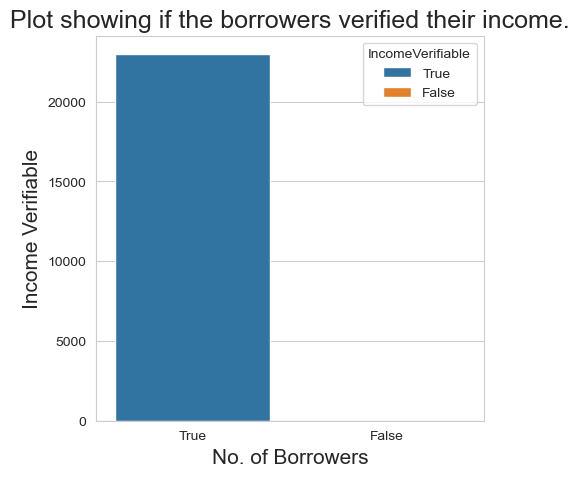

In [42]:
# Plot of the Income Verifiable of the Borrowers.
fig, ax = plt.subplots(figsize=(5, 5))
x_axis= data_df_copy.IncomeVerifiable
sb.countplot(x=x_axis, hue=x_axis, data=x_axis, dodge=False)
axis_and_titles(plot_title='Plot showing if the borrowers verified their income.', 
                xaxis_label= 'No. of Borrowers',
                yaxis_label= 'Income Verifiable',
                set_grid=True)

### Observation
Based on the above visualization, 99% of the borrowers are able to provide proof of documentation backing up their income. This indicates that this is a crucial factor in granting a borrower a loan or not.

### Question
### What is the distribution of the initial Monthly Income as stated by the borrowers?

StatedMonthlyIncome refers to the initial monthly income stated by the borrower as of the time the listing was created.

In [43]:
# Getting the descriptive summary of the data
data_df_copy['StatedMonthlyIncome'].describe()

count    22986.000000 
mean     5618.882943  
std      5703.358541  
min      1.416667     
25%      3333.333333  
50%      4750.000000  
75%      6833.333333  
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64

Since the Stated Monthly Income can be arguably preferred as an integer datatype, it will be converted from a float to an integer datatype/dtype.

In [44]:
# Converting the StatedMonthlyIncome variables to integers
data_df_copy['StatedMonthlyIncome'] = data_df_copy['StatedMonthlyIncome'].map(int)

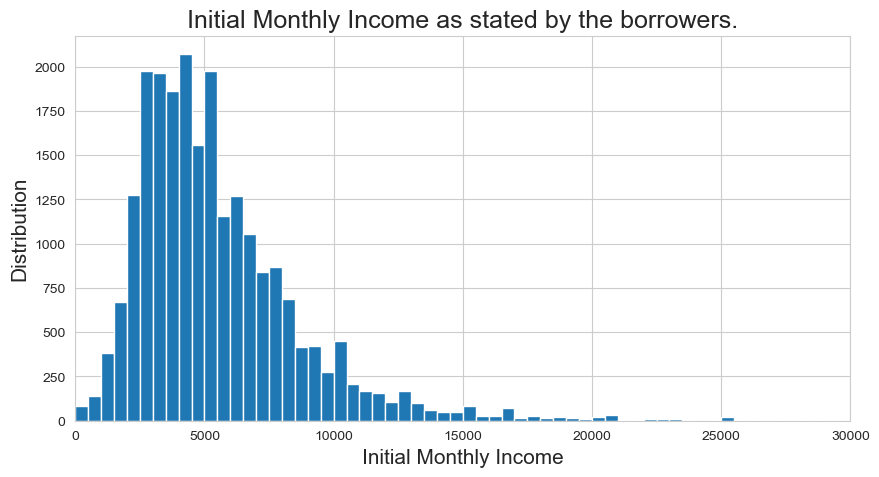

In [45]:
# Plot of the histogram distribution of the CreditScoreRangeLower.
fig, ax = plt.subplots(figsize=(10, 5))

# Get the ticks for bins
bins = np.arange(0, data_df_copy['StatedMonthlyIncome'].max()+500, 500)

# Plot the histogram for the StatedMonthlyIncome column
plt.hist(data=data_df_copy, x='StatedMonthlyIncome', bins=bins);
plt.xlim((0,30000));

axis_and_titles(plot_title='Initial Monthly Income as stated by the borrowers.', 
                xaxis_label= 'Initial Monthly Income',
                yaxis_label= 'Distribution',
                set_grid=True)

### Observation
Most borrowers had an initial monthly income of approximately $4750 USD on average as at the time of the listing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variables of interest chosen were the 'ProsperScore', 'IncomeRange', 'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome', 'CreditScoreRangeLower', and 'CreditScoreRangeUpper'. They were chosen to identify if the borrower's income or support of income can impact the decision in the borrower being granted a loan or not.

> The distribution of the DebtToIncomeRatio, StatedMonthlyIncome, CreditScoreRangeLower, and CreditScoreRangeUpper displayed a left-skewed or negative-skewed distribution, indicating that the preferred measure of central tendency is mean. The distribution is also unimodal that is having one peak(or mode). To my knowledge, no unusual points were identified. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distributions were identified to my knowledge. On the other hand, to tidy/clean up the data, the missing values were removed as this step is crucial for proper representative data analysis. In addition for the IncomeRange column, the 'Not employed' variable was converted to $0 following the format of the other variables under the column. Then, the IncomeRange and IncomeVerifiable features were converted to ordered categorical variables for proper visualization. Finally the ProsperScore was converted from an float to an integer as a score metric.

## Bivariate Exploration

### Question:
### What is the Pairwise correlation on Numerical Features
First, the goal is to identify the pairwise correlations between the following numerical features; 'ProsperScore', 'DebtToIncomeRatio', and 'StatedMonthlyIncome' in the data.

In [46]:
# Setting the numeric and categorical variables.
numeric_vars = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'ProsperScore']
categorical_vars= ['IncomeRange', 'IncomeVerifiable']

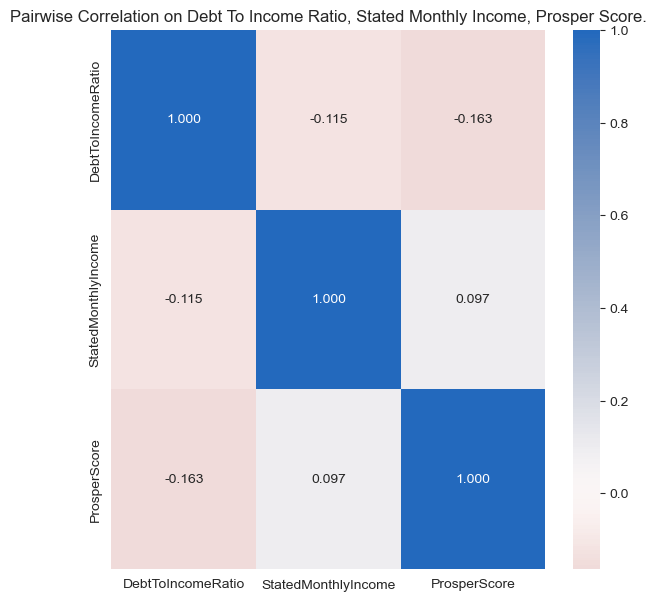

In [47]:
# Correlation plot
plt.figure(figsize = [7, 7])
sb.heatmap(data_df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
# Include the title of the plot
plt.title("Pairwise Correlation on Debt To Income Ratio, Stated Monthly Income, Prosper Score.", fontsize=12)
plt.show()

### Observation
The correlation plot above indicates that there is a negative correlation (-0.115) between the DebtToIncomeRatio and the StatedMonthlyIncome, as well as between the DebtToIncomeRatio and ProsperScore (-0.163). This indicates that as one variable increases, this results in the decrease of the other variable. On the other hand, there is almost no correlation (0.097) between the StatedMonthlyIncome and ProsperScore features.

Reference: https://www.investopedia.com/terms/n/negative-correlation.asp

### Question
### What is the distribution of the Numerical Features?
Here, the goal is to explore further and display the distribution between the following numerical features; 'ProsperScore', 'DebtToIncomeRatio', and 'StatedMonthlyIncome' in the data

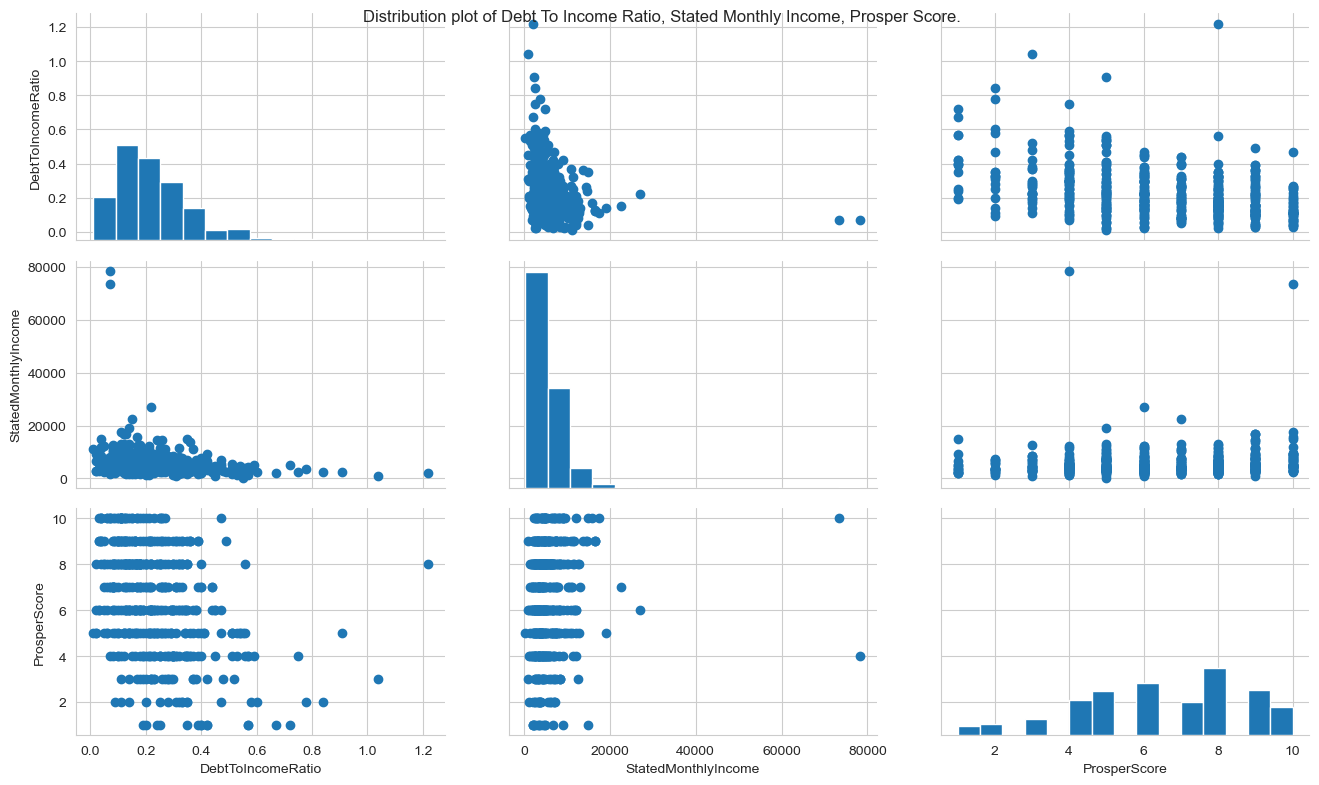

In [48]:
# Plotting a matrix to sample 500 loans
data_df_copy_samp =data_df_copy.sample(500)
g = sb.PairGrid(data = data_df_copy_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 15);
g.map_offdiag(plt.scatter)
## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(14, 8);
g.fig.suptitle("Distribution plot of Debt To Income Ratio, Stated Monthly Income, Prosper Score.");

### Observation
The matrix plot further confirms the correlation plot. It also indicates that the distribution of the DebtToIncomeRatio and StatedMonthlyIncome displayed a left-skewed or negative-skewed distribution and a unimodal distribution. In this case, the mean would be preferred as a measure of central tendency. The ProsperScore in contrast displays a right-skewed distribution and a unimodel distribution. This indicates that a preferred measure of central tendency is median since it is less sensitive to higher values than the mean.

### Question

### What is the Debt to Income ratio by Income range of the borrowers?
DebtToIncomeRatio Versus IncomeRange: In this scenario, the goal is to compare the debt to income ratio by the income range.

In [49]:
# Getting all income range sorted based on the debt to income ratio.
data_df_copy.groupby('IncomeRange')['DebtToIncomeRatio'].mean().sort_values(ascending=True)

IncomeRange
$100,000+         0.165985
$75,000-99,999    0.193223
$50,000-74,999    0.222966
$25,000-49,999    0.268751
$0                0.340000
$1-24,999         0.605030
Name: DebtToIncomeRatio, dtype: float64

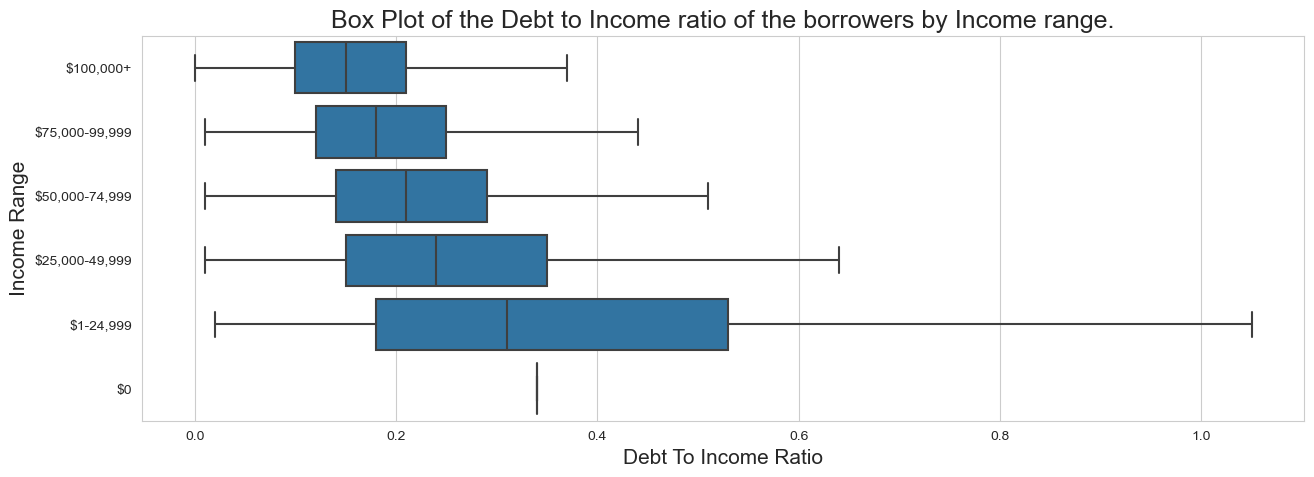

In [50]:
# boxplots
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data=data_df_copy, y = 'IncomeRange', x = 'DebtToIncomeRatio', color=base_color, showfliers = False);
axis_and_titles(plot_title='Box Plot of the Debt to Income ratio of the borrowers by Income range.', 
                xaxis_label= 'Debt To Income Ratio',
                yaxis_label= 'Income Range',
                set_grid=True)

### Observation
The box plot above indicates that the borrowers with a higher salary range have a lower debt to income ratio. The range of the debt to income ratio also decreases as the income increases, with the exception of the salary range of $0 which has a fixed debt to income ratio of 0.34 since it is a single variable.

### Question
### What is the statistics of the Income Range grouped by the Verifiable Income.
IncomeVerifiable Versus IncomeRange: Plotting the distribution of the Income Range with Verifiable Income.

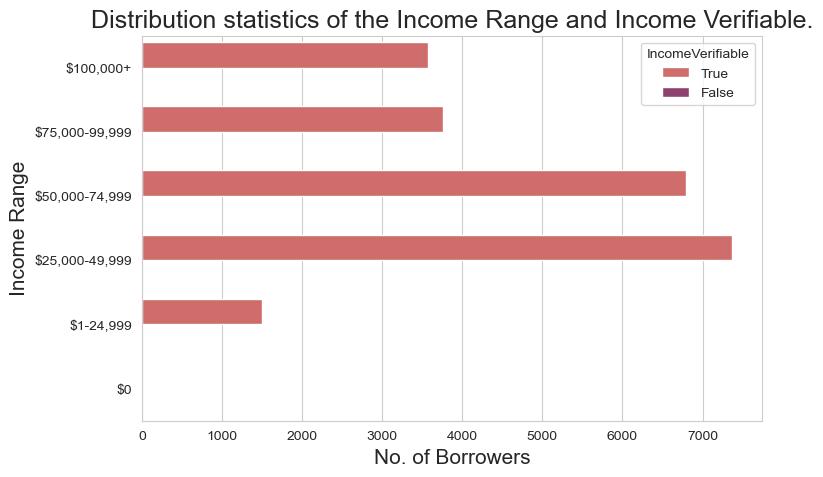

In [51]:
# clustered bar chart
plt.figure(figsize = [8,5])
ax = sb.countplot(data = data_df_copy, y = 'IncomeRange', hue = 'IncomeVerifiable', palette='flare')

axis_and_titles(plot_title='Distribution statistics of the Income Range and Income Verifiable.', 
                xaxis_label= 'No. of Borrowers',
                yaxis_label= 'Income Range',
                set_grid=True)

### Observation
The plot confirms that 99% of the borrowers were able to provide supporting document that backs up their income. This means that in addition to the borrower's income, providing the neccessary documentation to support one's income is crucial in determining if a loan could be granted or not. 

### Question

### What is the plot of the Prosper risk score assigned per Income Range?
IncomeRange versus ProsperScore: Checking the distribution of the income range of the borrow and the assigned credit ratings.

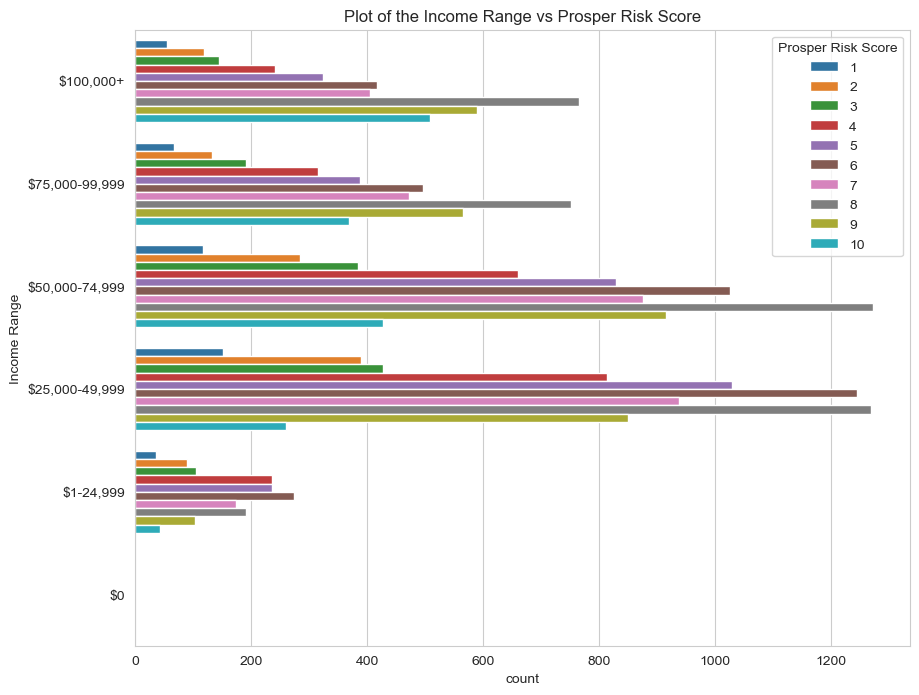

In [52]:
# clustered bar chart
plt.figure(figsize = [10,8])
ax = sb.countplot(data = data_df_copy, y = 'IncomeRange', hue = 'ProsperScore')

ax.legend(title='Prosper Risk Score')
plt.title('Plot of the Income Range vs Prosper Risk Score')
plt.ylabel('Income Range');

### Observation
From the plot above, it can be observed that a risk score of 8 (low risk) is common for all salary ranges except for the range of $1-24,999 where the highest count of the risk score is 6 (average risk).

### Question
### What is the plot of the IncomeRange versus the median ProsperScore?

To further analyze the visualiazation and validate the conclusions, the Income Range of the borrower would be grouped based on the median score of the ProsperScore (since it has a right-skewed distribution).

In [53]:
# Grouping the IncomeRange by the median of the ProsperScore.
data_df_copy.groupby('IncomeRange')['ProsperScore'].median().sort_values(ascending=True)

IncomeRange
$25,000-49,999    6.0
$1-24,999         6.0
$75,000-99,999    7.0
$50,000-74,999    7.0
$100,000+         8.0
$0                8.0
Name: ProsperScore, dtype: float64

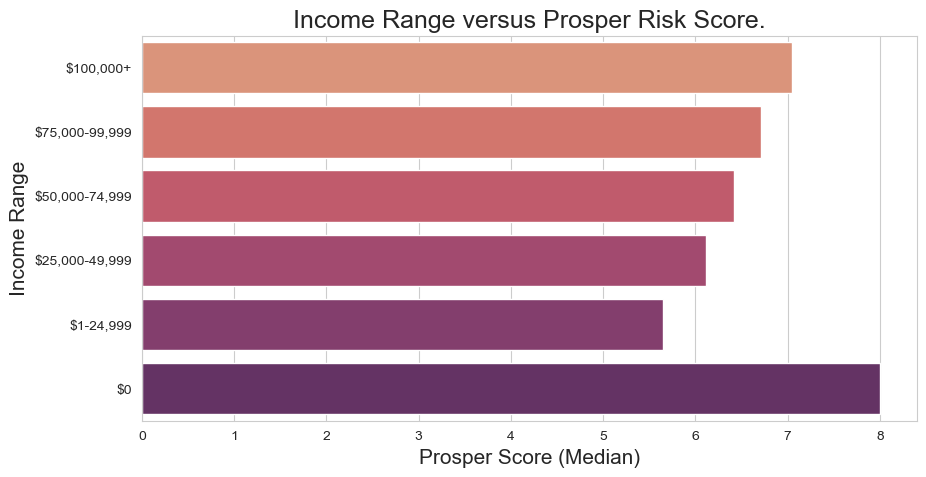

In [54]:
# Plot of the IncomeRange versus the median ProsperScore.
fig, ax = plt.subplots(figsize=(10, 5))
x_axis=data_df_copy.groupby('IncomeRange')['ProsperScore'].mean().sort_values(ascending=True)
y_axis=x_axis.index

sb.barplot(x=x_axis, y=y_axis, orient='h', palette='flare')
axis_and_titles(plot_title='Income Range versus Prosper Risk Score.', 
                xaxis_label='Prosper Score (Median)',
                yaxis_label='Income Range',
                set_grid=True)

### Observation
In this plot, it becomes more clear what the common prosper risk scores are for each income range. It further indicates that as the income range increases, the Prosper risk score commonly increases with the exception of the $0 USD income range which has a low risk factor. 

### Question
### How does the Stated monthly income at the time of listing differ from the Borrower's current Income Range ?
To further analyze why the low income range still has a low risk factor, the stated income at the time of listing will be compared with the current income range.

In [55]:
# Grouping the IncomeRange by the mean of the StatedMonthlyIncome.
data_df_copy.groupby('IncomeRange')['StatedMonthlyIncome'].mean().sort_values(ascending=True)

IncomeRange
$1-24,999         1473.939130 
$0                2167.000000 
$25,000-49,999    3129.369049 
$50,000-74,999    5026.192019 
$75,000-99,999    7049.847629 
$100,000+         12114.122340
Name: StatedMonthlyIncome, dtype: float64

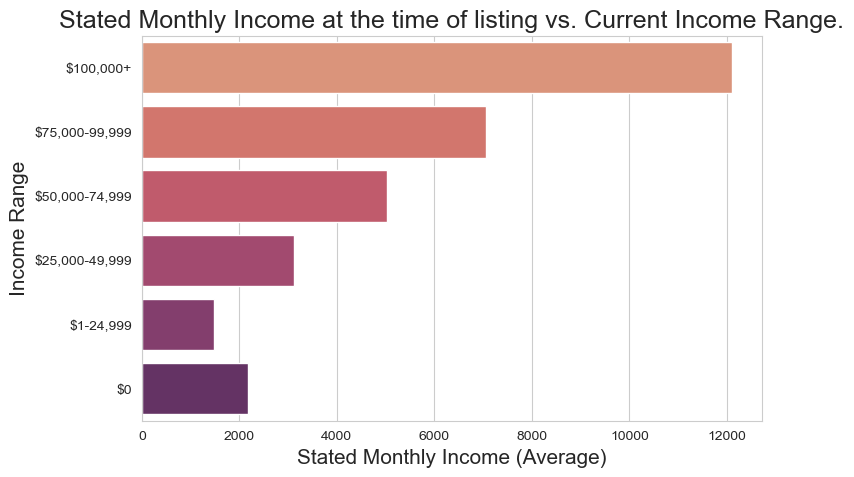

In [56]:
# Plot of the IncomeRange versus the average StatedMonthlyIncome.
fig, ax = plt.subplots(figsize=(8, 5))
x_axis=data_df_copy.groupby('IncomeRange')['StatedMonthlyIncome'].mean().sort_values(ascending=True)
y_axis=x_axis.index
sb.barplot(data=data_df_copy,
           x=x_axis, y=y_axis, orient='h', palette='flare')
axis_and_titles(plot_title='Stated Monthly Income at the time of listing vs. Current Income Range.', 
                xaxis_label='Stated Monthly Income (Average)',
                yaxis_label='Income Range',
                set_grid=True)

### Observation
The plot shows that at the time of listing, the borrower with income range of 0 USD had a Monthly income of approximately 2,167 USD on an average before being unemployed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As part of this investigation, in summary, I observed the following;
1. A negative correlation (-0.115) exist between the DebtToIncomeRatio and the StatedMonthlyIncome, as well as between the DebtToIncomeRatio and ProsperScore (-0.163) indicating that as one variable increases, the other variable decreases in turn. On the other hand, there is almost no correlation (0.097) between the StatedMonthlyIncome and ProsperScore features.

2. The distribution of the DebtToIncomeRatio and StatedMonthlyIncome displayed a left-skewed and unimodal distribution, hence a mean would be preferred as a measure of central tendency. In contrast, the ProsperScore showed a right-skewed and unimodal distribution which indicates that a preferred measure of central tendency is median since it is less sensitive to higher values than the mean.

3. Borrowers with a higher salary range have a lower debt to income ratio. The debt to income ratio range as shown in the boxplot also decreases as the income increases. The salary range of $0 did not have a range but a fixed debt to income ratio of 0.34 since it is a single variable.

4. 99% of the borrowers were able to provide supporting document that backs up their income indicating that this is a neccessary criteria in determining if a loan could be granted to the borrower or not. 

5. A risk score of 8 (low risk) is common for all salary ranges except for the range of 1-24,999 USD where the highest count of the risk score is 6 (average risk). In addition, at the time of listing, the borrower with income range of 0 USD indicates that they had a Monthly income of approximately $2,167 USD on an average before being unemployed.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, I only identify any interesting relationship outside the main feature(s) of interest which I focused on. In future, this could be explored further.  

## Multivariate Exploration

### Question:
### What is the plot of the IncomeRange and IncomeVerifiable in relation to the Median ProsperScore
The multivariate exploration below will display the relationship between the 'IncomeRange', 'IncomeVerifiable and 'ProsperScore'

In [57]:
# Grouping the IncomeVerifiable and IncomeRange by the median of the ProsperScore.
data_df_copy.groupby(['IncomeVerifiable', 'IncomeRange']).median()['ProsperScore']

IncomeVerifiable  IncomeRange   
True              $100,000+         8.0
                  $75,000-99,999    7.0
                  $50,000-74,999    7.0
                  $25,000-49,999    6.0
                  $1-24,999         6.0
                  $0                8.0
False             $100,000+         2.0
                  $75,000-99,999   NaN 
                  $50,000-74,999   NaN 
                  $25,000-49,999   NaN 
                  $1-24,999        NaN 
                  $0               NaN 
Name: ProsperScore, dtype: float64

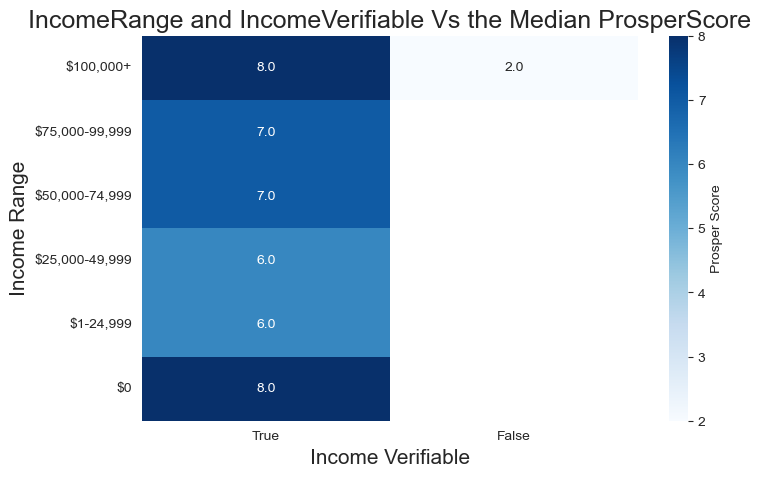

In [58]:
# Plotting a heat map
plt.figure(figsize = [8,5])
data_group = data_df_copy.groupby(['IncomeVerifiable', 'IncomeRange']).median()['ProsperScore']
data_group = data_group.reset_index(name = 'ProsperScore')
data_group = data_group.pivot(index = 'IncomeRange', columns = 'IncomeVerifiable', values = 'ProsperScore')
sb.heatmap(data_group, annot = True, fmt = '.1f', cmap = "Blues", cbar_kws = {'label' : 'Prosper Score'})

axis_and_titles(plot_title='IncomeRange and IncomeVerifiable Vs the Median ProsperScore', 
                xaxis_label='Income Verifiable',
                yaxis_label='Income Range',
                set_grid=True)

### Observation
This plot provides more insight regarding the median prosper risk score. In this case, it shows that the median risk score for income range of 1-49,999 USD, 50,000-99,999 USD and 100,000+ USD with verifiable income is 6, 7 and 8 respectively. This shows that the higher the income range, the higher the median prosper score becomes (i.e. the less risky it is to lend out a loan to the borrower). This is with the exception of the 0USD income range which still has a low risk median prosper score. This is a unique case which opens up possibilities for more future findings. For non-verifiable income, even though the income range was high (100,000+ USD), the risk score is still very high (2.0). This once again proves that showing a proof of documentation to back up the income is a key factor in determining if the borrower will be granted a loan or not.

### Question:
### What is the pairplot of the DebtToIncomeRatio and ProsperScore with respect to the IncomeRange.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pairplot of Debt To Income Ratio and Prosper Score with respect to the Income Range.')

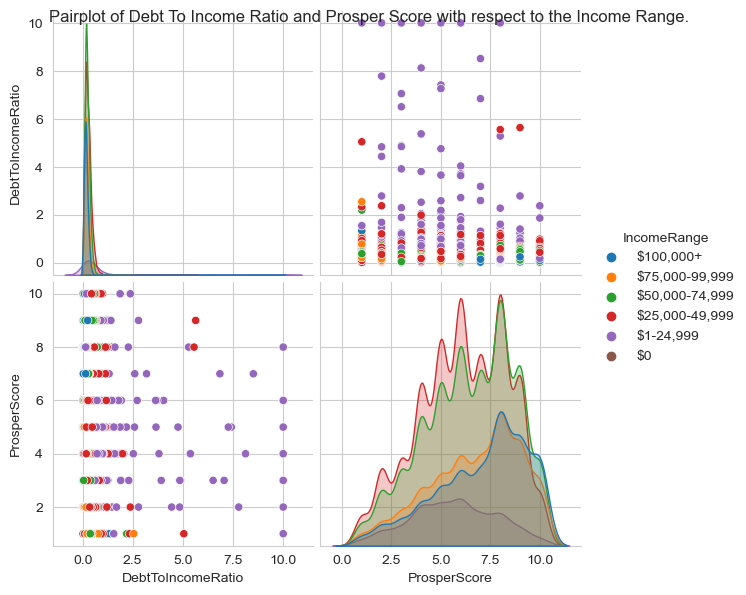

In [59]:
### Selecting columns of interest from the dataframe
column_df = data_df_copy.loc[:,['IncomeRange', 'DebtToIncomeRatio', 'ProsperScore']]
sb_plot = sb.pairplot(column_df, hue='IncomeRange', size=3)

# Include the title of the plot
sb_plot.fig.suptitle("Pairplot of Debt To Income Ratio and Prosper Score with respect to the Income Range.")

### Observation:
From observation, in this case, when grouped by the income range, the income range with the highest debt to income ratio is at 50,000-74,999 USD. In addition, the highest risk Prosper Score is commonly associated with the income range holders of 25,000-49,999 USD and 75,000-99,999 USD respectively.

### Question:
### What is the pairplot of the DebtToIncomeRatio and ProsperScore with respect to the IncomeRange?

In [ ]:
### Selecting columns of interest from the dataframe
column_df = data_df_copy.loc[:,['IncomeRange', 'ProsperScore', 'StatedMonthlyIncome']]
sb_plot = sb.pairplot(column_df, hue='IncomeRange', size=3)
# Include the title of the plot
sb_plot.fig.suptitle("Pairplot of Prosper Score and Stated Monthly Income wrt Income Range.")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Pairplot of Prosper Score and Stated Monthly Income wrt Income Range.')

### Observation
Just like in the plot above, he highest risk Prosper Score is also commonly associated with the income range holders of 25,000-49,999 USD and 75,000-99,999 USD respectively. However, the income range of 25,000-49,999 USD and 50,000-74999 USD respectively has shown to have a higher stated monthly income at the time of listing. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Based on analysis, a key takeaway is that the IncomeVerifiable plays a major role in determining if a loan will be granted or not. Here I observed that;
1. The median prosper risk score for income range of 1-49,999 USD, 50,000-99,999 USD and 100,000+ USD with verifiable income is 6, 7 and 8 respectively, hence indicating that it is less risky to lend out a loan to the borrower as thier salary range increases. However this is only the case where a verifiable income is provided.
2. For non-verifiable income, even though the income range was high (100,000+ USD), it still indicates a very high prosper risk score.
3. When grouped by the income range directly, the income range with the highest debt to income ratio is at 50,000-74,999 USD. In addition, the highest risk Prosper Score and stated monthly income is commonly associated with the income range holders of 25,000-49,999 USD and 75,000-99,999 USD respectively.

### Were there any interesting or surprising interactions between features?

> I was quite surprised that even with a high income range (>100,000USD), a borrower is still marked as high risk once they are not able to provide proof of documentation to back up their income. This could be associated with the fact that some unexpected life events could happen and in the case of this happening, if there is no guarantee for the borrower to pay back a loan, it puts the lender is at risk of losing their money. 

## Conclusions
Based on analysis, a key takeaway is that the IncomeVerifiable feature plays a major role in determining if a loan will be granted or not. This means that providing sufficient means of documentation to back up the borrower's income can be a major factor in determining if the borrow is high risk or not, hence indicating they are being granted loan or not. 
